In [1]:
%%sh
pwd

/Users/sankha/Desktop/research/southern_puna_git/velest


In [2]:
#Import required modules
import matplotlib.pyplot as plt
import numpy as np
import pygmt
from scipy.stats import norm
import pandas as pd
import random

Initial mean and variance= -0.20766094495203713 0.6104003196190059
Final mean and variance= 0.03257969298293276 0.4405818100952548


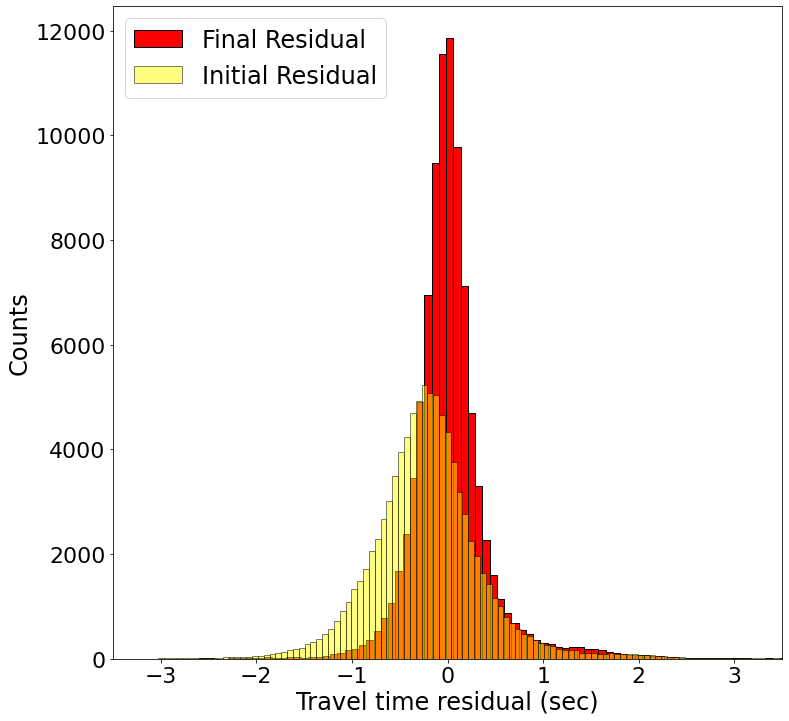

In [4]:
df_i=pd.read_csv("./model/inpmd_const_puna_ini.RES",sep="\s+",header=None)[1]
df_f=pd.read_csv("./model/inpmd_const_puna_v2.RES",sep="\s+",header=None)[1]

print("Initial mean and variance=",np.mean(df_i),np.std(df_i))
print("Final mean and variance=",np.mean(df_f),np.std(df_f))
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,12))
plt.hist(df_f,bins=200, edgecolor='black', color='red',alpha=1,label="Final Residual")
plt.hist(df_i,bins=200, edgecolor='black', color='yellow',alpha=0.5,label="Initial Residual")

plt.xlim([-3.5,3.5])

#plt.text(-3.4,5000,"Mean: %4.3f ---> %4.3f\n SD: %4.3f ---> %4.3f"
     #    %(np.mean(df_i),np.mean(df_f),np.std(df_i),np.std(df_f)),bbox=dict(fc="none"),fontsize=18)
plt.xlabel('Travel time residual (sec)',fontsize=24)
plt.ylabel('Counts',fontsize=24)
plt.legend(loc='upper left',fontsize=24)
#plt.title('Residual of phase arrivals before and after VELEST run',fontsize=14 )
#plt.savefig('./output/Residual_histogram_velest.jpg', dpi=300)

[0.654216, 0.562863, 0.531961, 0.510881, 0.501507, 0.4995, 0.481496, 0.482373, 0.482692, 0.467688, 0.470209]


Text(0.5, 1.0, 'Residual reduction (Step 1)')

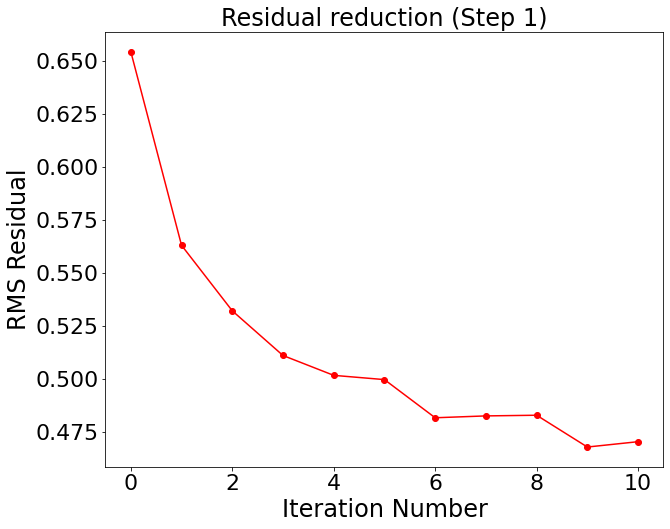

In [6]:
#with open('../velest_hpc_2/inpmd_const_puna_good_v1.OUT','r') as fi:
with open('./model/inpmd_const_puna_v1.OUT','r') as fi:
    iterr=[]
    rmse=[]
    c=0
    for i in fi:              
        if i.startswith(" DATVAR="):            
            errline=i[1:].split()
            iterr.append(c)
            rmse.append(float(errline[8]))    
            c+=1
print(rmse)

## Define figure "canvas"
fig = plt.figure(figsize=(10, 8))
plt.plot(iterr,rmse,'-o',color='red')
plt.xlabel('Iteration Number',fontsize=24)
plt.ylabel('RMS Residual',fontsize=24)
plt.title('Residual reduction (Step 1)',fontsize=24)
#plt.savefig('./output/inpmd_const_v2_step1_residual_reduction.png', dpi=300)


In [8]:
%%sh

#Reformat the files for plotting
rm velmodel_in.txt velmodel_out.txt velmodel_out_2.txt

mod1=./model/inpmd_const.mod
mod2=./model/inpmd_const_puna_v2.mod
#mod3=inpmd_const_testhigh_v3.mod
#########################
#The row numbers will change based on depth layer structure

cat $mod1 | awk '{if (NR>2 && NR<18) print $2,'\t',$1}'>temp1.txt 
cat $mod1 | awk '{if (NR>18 && NR<34) print $1}' >temp2.txt

paste temp1.txt temp2.txt>>velmodel_in.txt
rm temp1.txt temp2.txt

#echo "Input model"
cat velmodel_in.txt

 #######################
cat $mod2 | awk '{if (NR>2 && NR<18) print $2,'\t',$1}'>temp1.txt 
cat $mod2 | awk '{if (NR>18 && NR<34) print $1}' >temp2.txt
paste temp1.txt temp2.txt>>velmodel_out.txt
rm temp1.txt temp2.txt

#echo "Output model"
cat velmodel_out.txt

#######################
#cat $mod3 | awk '{if (NR>2 && NR<18) print $2,'\t',$1}'>temp1.txt 
#cat $mod3 | awk '{if (NR>18 && NR<34) print $1}' >temp2.txt
#paste temp1.txt temp2.txt>>velmodel_out_2.txt
#rm temp1.txt temp2.txt
#cat velmodel_out_2.txt

-5.0  6.00	3.45
0.0  6.00	3.45
3.0  6.00	3.45
6.0  6.00	3.45
9.0  6.00	3.45
12.0  6.00	3.45
15.0  6.00	3.45
20.0  6.00	3.45
25.0  6.00	3.45
30.0  6.00	3.45
35.0  6.00	3.45
40.0  6.00	3.45
45.0  6.30	3.60
50.0  6.30	3.60
58.0  8.11	4.49
-5.00  5.72	3.28
0.00  5.78	3.46
3.00  5.88	3.46
6.00  5.89	3.50
9.00  5.90	3.51
12.00  5.92	3.52
15.00  5.92	3.55
20.00  6.08	3.60
25.00  6.14	3.60
30.00  6.17	3.74
35.00  6.30	3.74
40.00  6.33	4.17
45.00  6.33	4.17
50.00  6.33	4.23
58.00  7.85	4.30


rm: velmodel_out_2.txt: No such file or directory


In [9]:
dep_in_list=np.repeat(np.loadtxt('velmodel_in.txt')[:, 0],2)
vp_in_list=np.repeat(np.loadtxt('velmodel_in.txt')[:, 1],2)
vs_in_list=np.repeat(np.loadtxt('velmodel_in.txt')[:, 2],2)
##
dep_out_list=np.repeat(np.loadtxt('velmodel_out.txt')[:, 0],2)
vp_out_list=np.repeat(np.loadtxt('velmodel_out.txt')[:, 1],2)
vs_out_list=np.repeat(np.loadtxt('velmodel_out.txt')[:, 2],2)
##
#dep_out2_list=np.repeat(np.loadtxt('velmodel_out_2.txt')[:, 0],2)
#vp_out2_list=np.repeat(np.loadtxt('velmodel_out_2.txt')[:, 1],2)
#vs_out2_list=np.repeat(np.loadtxt('velmodel_out_2.txt')[:, 2],2)
#print(vp_out2_list)
dep_in=dep_in_list[1:] #change to 3: to leave out the top later
dep_out=dep_out_list[1:]
#dep_out2=dep_out2_list[1:]

vp_in=vp_in_list[0:len(vp_in_list)-1]  #change to 2: to leave out the top later
vs_in=vs_in_list[0:len(vs_in_list)-1]
vp_out=vp_out_list[0:len(vp_out_list)-1]
vs_out=vs_out_list[0:len(vs_out_list)-1]
#vp_out2=vp_out2_list[0:len(vp_out_list)-1]
#vs_out2=vs_out2_list[0:len(vs_out_list)-1]

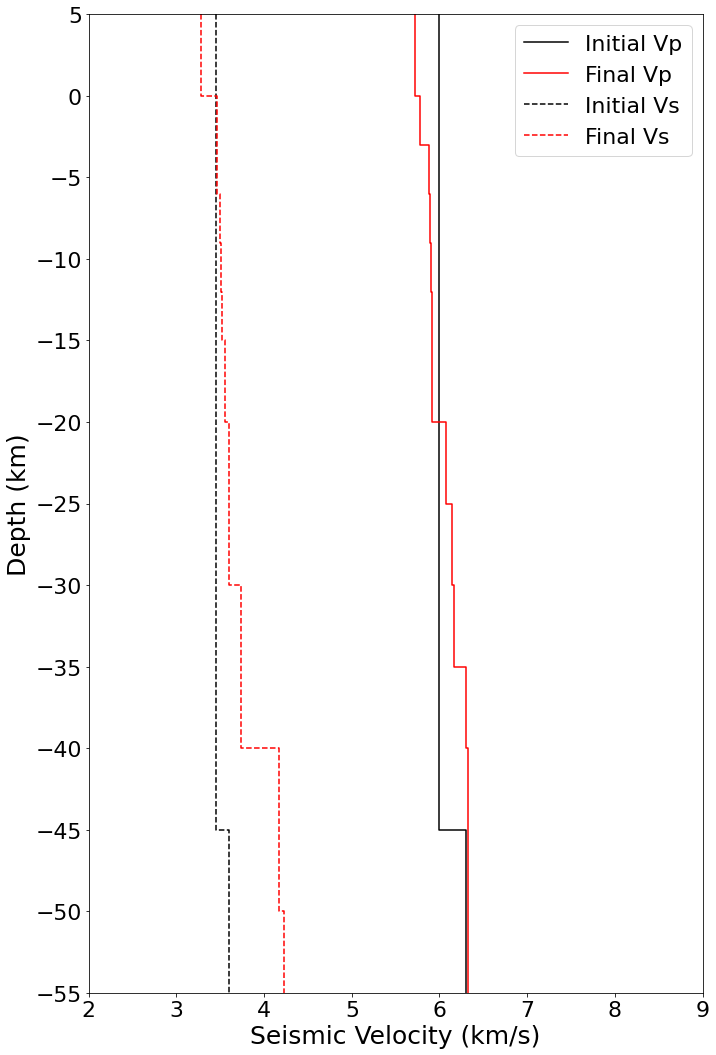

In [10]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(11,18))
plt.plot(vp_in,-dep_in,color='black')
plt.plot(vp_out,-dep_out,color='red')

#plt.plot(vp_out2,-dep_out,color='blue')

plt.plot(vs_in,-dep_in,color='black',linestyle='dashed')
plt.plot(vs_out,-dep_out,color='red',linestyle='dashed')

#plt.plot(vs_out2,-dep_out,color='blue',linestyle='dashed')

plt.xlim([2,9])
plt.ylim([-55,5])
plt.yticks(np.arange(-55, 6,5))
plt.xlabel('Seismic Velocity (km/s)',fontsize=25)
plt.ylabel('Depth (km)',fontsize=25)
plt.legend(['Initial Vp','Final Vp','Initial Vs','Final Vs'])
#plt.legend(['Model Vp','Low-Final Vp','High-Final Vp','Initial Vs','Low-Final Vs','High-Final Vs'],loc='upper right',fontsize=18)
#plt.savefig("./output/model_final.png",dpi=300)

In [11]:
#Randomly shifting latitude, longitude and depth +-10 km to check the stability

#Read final catalog
cat_final=pd.read_csv("./output/catalog_velest_puna_crust_v5.txt",sep="\s+",header=None)

lat_si=cat_final[6].values
lon_si=cat_final[7].values
dep_si=cat_final[8].values

shift=10.0 #10 km shift

for i in range(len(lat_si)):
    lat_si[i]+=(shift*random.choice([1,-1])/111.1)
    lon_si[i]+=(shift*random.choice([1,-1])/111.1)
    
    if dep_si[i]>10: #avoiding airquakes
        dep_si[i]+=(shift*random.choice([1,-1]))
    else:
        dep_si[i]+=10
        
#Write to a new file        
cat_final.to_csv("./hyposhift/catalog_velest_puna_crust_shifted.txt",sep=" ",header=None,index=False)
print(len(dep_si))


#Now run perl selectphase.pl to include the new hypocenters to phasefile
#Run convertformat.pl to make velest input file
#Run velest

2644


In [124]:
#checking the difference between location after velest run

#Actual catalog
cat_final=pd.read_csv("./output/catalog_velest_puna_crust_v5.txt",sep="\s+",header=None)
print(cat_final)
lat_f=cat_final[6].values
lon_f=cat_final[7].values
dep_f=cat_final[8].values

#Catalog after inversion with shifted initial hypocenter
cat_shft_final=pd.read_csv("./hyposhift/catalog_velest_shifted_v2.txt",sep="\s+",header=None)
print(cat_shft_final)
lat_s=cat_shft_final[6].values
lon_s=cat_shft_final[7].values
dep_s=cat_shft_final[8].values

#Differences after inversion
dlat=(np.array(lat_s)-np.array(lat_f))*111.1
dlon=(np.array(lon_s)-np.array(lon_f))*111.1
ddep=np.array(dep_s)-np.array(dep_f)

#Differences before inversion
dlat_i=(np.array(lat_si)-np.array(lat_f))*111.1
dlon_i=(np.array(lon_si)-np.array(lon_f))*111.1
ddep_i=np.array(dep_si)-np.array(dep_f)


      0   1   2   3   4      5        6        7      8     9    10    11
0      8   1   1   0  48  10.18 -26.5914 -67.2805  13.64     1  124  0.28
1      8   1   1   9   3   3.01 -26.7383 -66.1851  24.23     2  150  0.23
2      8   1   3   5  36  11.42 -25.9514 -66.7780  -0.83     5  170  0.14
3      8   1   3  21  36  20.53 -26.4465 -66.4141   3.28     6  162  0.32
4      8   1   4   6   2  46.76 -25.8471 -67.3258   7.00     7  168  0.22
...   ..  ..  ..  ..  ..    ...      ...      ...    ...   ...  ...   ...
2639   9   9  25  18  17   9.34 -25.8678 -67.7674  14.70  3082  157  0.94
2640   9   9  26   6  31  16.97 -27.3956 -66.6651   7.30  3083   93  0.22
2641   9   9  28  17  57   3.75 -27.3156 -66.5992   2.90  3084   68  0.51
2642   9   9  29   0  29  20.29 -26.6560 -66.2623  15.56  3085   61  0.27
2643   9   9  29  12  38  38.21 -26.3628 -66.6946   0.29  3086   62  0.26

[2644 rows x 12 columns]
      0   1   2   3   4      5        6        7      8     9    10    11
0      8   1

0.05952085854765086 0.14897232602117633 0.7802987897125566
0.46925187527126383 0.6153964517625903 2.318069638122336


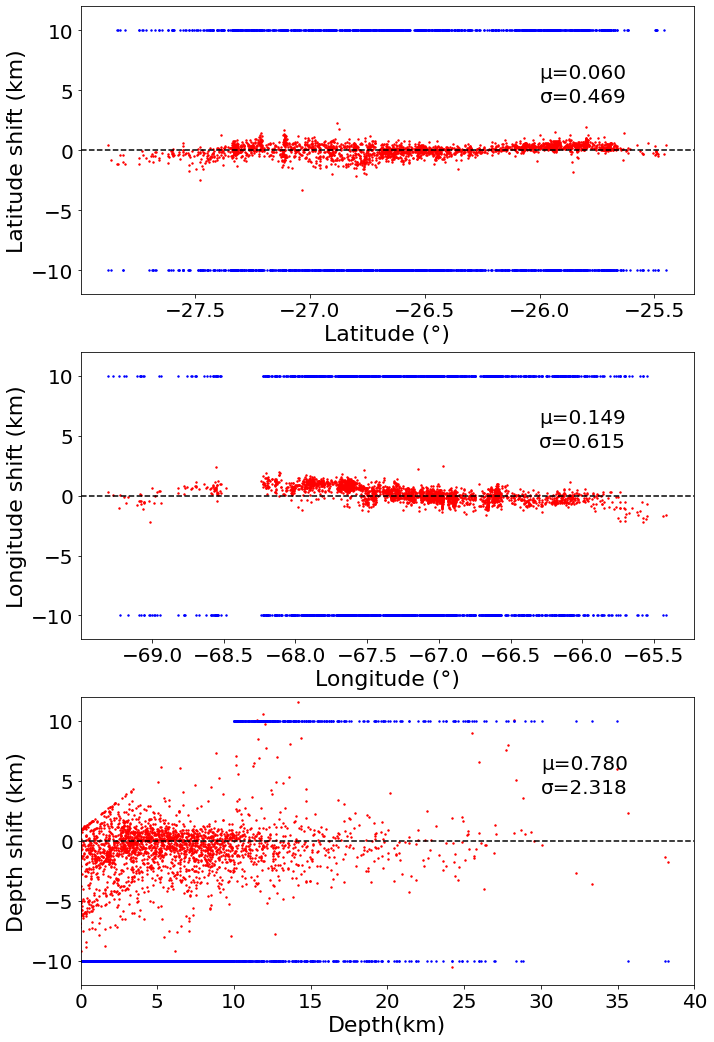

In [135]:
mean_dlat=(np.mean(np.array(dlat)))
mean_dlon=np.mean(np.array(dlon))
mean_ddep=np.mean(np.array(ddep))
std_dlat=np.std(np.array(dlat))
std_dlon=np.std(np.array(dlon))
std_ddep=np.std(np.array(ddep))
print(mean_dlat,mean_dlon,mean_ddep)
print(std_dlat,std_dlon,std_ddep)


fig=plt.figure(figsize=(11,18))
plt.rcParams.update({'font.size': 20})
fig.tight_layout(pad=5)
##
plt.subplot(3,1,1)
plt.scatter(lat_f,dlat,color="red",s=2)
plt.scatter(lat_f,dlat_i,color="blue",s=2)
plt.axhline(y=0.0, color='black', linestyle='--')
plt.xlabel("Latitude (\xb0)",fontsize=22)
plt.ylabel("Latitude shift (km)",fontsize=22)
plt.ylim([-12,12])
plt.text(-26,6,u"\u03bc=%4.3f"%(mean_dlat))
plt.text(-26,4,"\u03C3=%4.3f"%(std_dlat))
##
plt.subplot(3,1,2)
plt.scatter(lon_f,dlon,color="red",s=2)
plt.scatter(lon_f,dlon_i,color="blue",s=2)
plt.axhline(y=0.0, color='black', linestyle='--')
plt.xlabel("Longitude (\xb0)",fontsize=22)
plt.ylabel("Longitude shift (km)",fontsize=22)
plt.ylim([-12,12])
plt.text(-66.3,6,u"\u03bc=%4.3f"%(mean_dlon))
plt.text(-66.3,4,"\u03C3=%4.3f"%(std_dlon))
##
plt.subplot(3,1,3)

plt.scatter(dep_f,-ddep,color="red",s=2)
plt.scatter(dep_f,-ddep_i,color="blue",s=2)
plt.axhline(y=0.0, color='black', linestyle='--')
plt.xlabel("Depth(km)",fontsize=22)
plt.ylabel("Depth shift (km)",fontsize=22)
plt.ylim([-12,12])
plt.xlim([0,40])
plt.text(30,6,u"\u03bc=%4.3f"%(mean_ddep))
plt.text(30,4,"\u03C3=%4.3f"%(std_ddep))
plt.savefig("./output/hyposhift.png",dpi=300)